In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IPL.csv")
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
print(f"There are total {data.shape[0]} Rows and {data.shape[1]} Columns in Dataframe ")

There are total 74 Rows and 20 Columns in Dataframe 


In [4]:
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [6]:
data.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Text(0, 0.5, 'Teams')

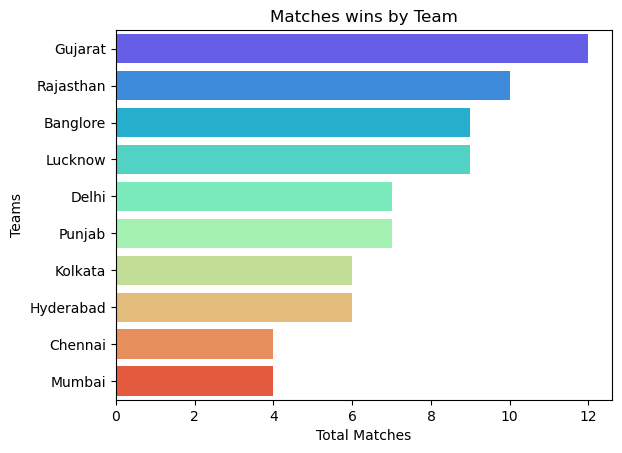

In [7]:
# Which team won most matches in season
match_winners = data["match_winner"].value_counts()
sns.barplot(y = match_winners.index , x = match_winners.values, palette = "rainbow")
plt.title("Matches wins by Team")
plt.xlabel("Total Matches")
plt.ylabel("Teams")

Text(0, 0.5, 'Total Matches')

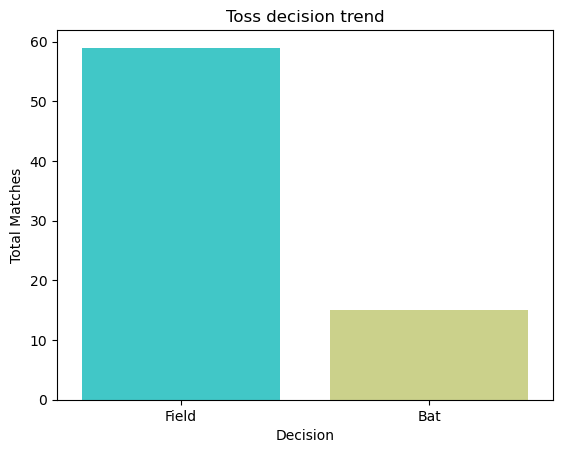

In [8]:
# Toss decision trend
t_decision = data["toss_decision"].value_counts()
sns.barplot(x = t_decision.index, y = t_decision.values, palette = "rainbow")
plt.title("Toss decision trend")
plt.xlabel("Decision")
plt.ylabel("Total Matches")

In [10]:
#Toss winner vs match winner
match_trend = data[data["toss_winner"] == data["match_winner"]]["match_id"].count()
win_pert = (match_trend * 100)/data.shape[0]
win_pert.round(1)

48.6

Text(0, 0.5, 'Total Matches')

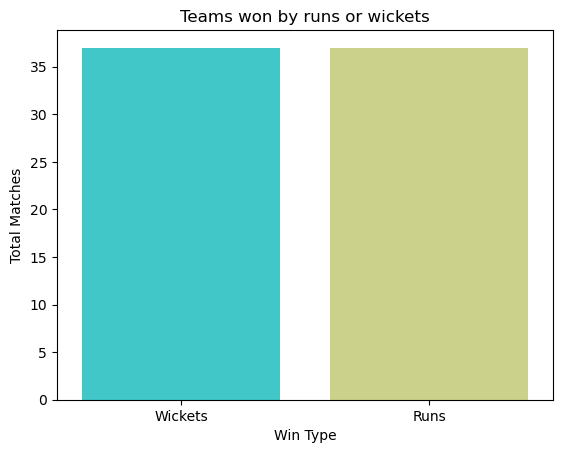

In [16]:
# Won by wickets or runs
sns.countplot(x = "won_by", data = data, palette = "rainbow")
plt.title("Teams won by runs or wickets")
plt.xlabel("Win Type")
plt.ylabel("Total Matches")

In [17]:
#Most player of the match
count = data["player_of_the_match"].value_counts().head(10)

Text(0, 0.5, 'Player name')

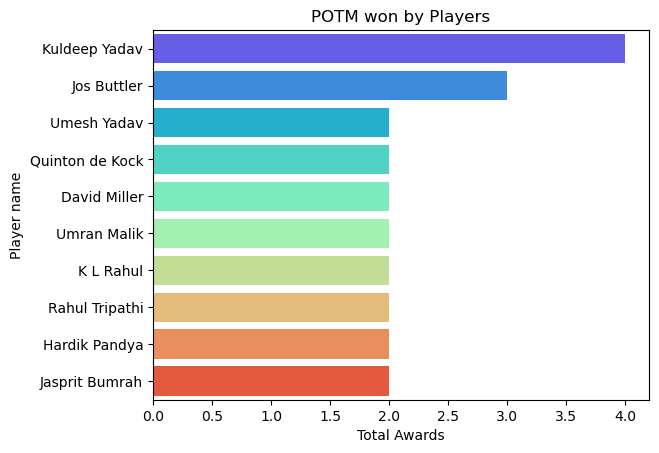

In [18]:
sns.barplot(y = count.index, x = count.values, palette = "rainbow")
plt.title("POTM won by Players")
plt.xlabel("Total Awards")
plt.ylabel("Player name")

In [20]:
#Top scorer of the match by runs 
high_scorere = data.groupby("top_scorer")["highscore"].sum().sort_values(ascending = False).head(2)
high_scorere

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0, 0.5, 'Runs')

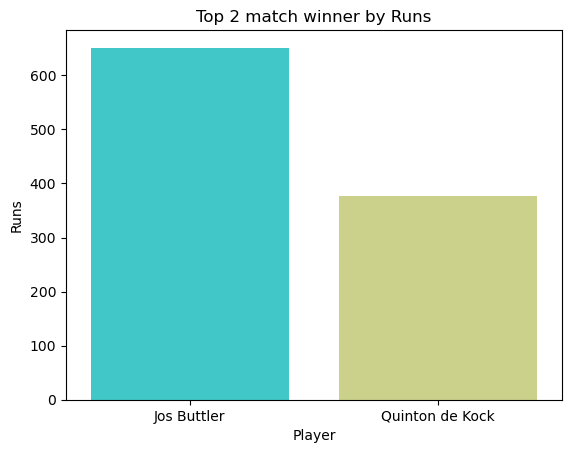

In [23]:
sns.barplot(x = high_scorere.index , y = high_scorere.values, palette = "rainbow")
plt.title("Top 2 match winner by Runs")
plt.xlabel("Player")
plt.ylabel("Runs")

In [50]:
#top wicket taker od the match
data["highest_wickets"] = data["best_bowling_figure"].apply(lambda x : x.split("--")[0])
data["highest_wickets"] = data["highest_wickets"].astype(int)
best_bowling = data.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending = False).head(2)
best_bowling

best_bowling
Yuzvendra Chahal    17
Kuldeep Yadav       11
Name: highest_wickets, dtype: int32

Text(0, 0.5, 'Wickets')

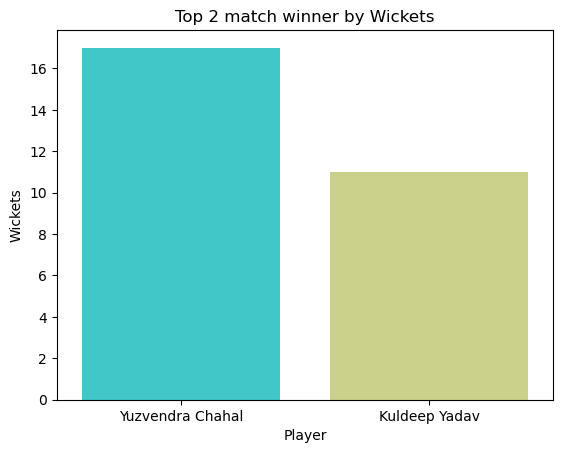

In [54]:
sns.barplot(x = best_bowling.index , y = best_bowling.values, palette = "rainbow")
plt.title("Top 2 match winner by Wickets")
plt.xlabel("Player")
plt.ylabel("Wickets")

In [60]:
#Most frequent match venue
Frequent_Venue = data["venue"].max()
Frequent_Venue

'Wankhede Stadium, Mumbai'

In [64]:
data.head(10)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128,10,...,7,Banglore,Wickets,3,Wanindu Hasaranga,Sherfane Rutherford,28,Wanindu Hasaranga,4--20,4
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210,7,...,4,Lucknow,Wickets,6,Evin Lewis,Quinton de Kock,61,Ravi Bishnoi,2--24,2
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137,10,...,4,Kolkata,Wickets,6,Umesh Yadav,Andre Russell,70,Umesh Yadav,4--23,4
8,9,"April 2,2022","Dr DY Patil Sports Academy, Mumbai",Mumbai,Rajasthan,Group,Mumbai,Field,193,8,...,8,Rajasthan,Runs,23,Jos Buttler,Jos Buttler,100,Jasprit Bumrah,3--17,3
9,10,"April 2,2022","Maharashtra Cricket Association Stadium,Pune",Delhi,Gujarat,Group,Delhi,Field,171,6,...,9,Gujarat,Runs,14,Lockie Ferguson,Shubman Gill,84,Lockie Ferguson,4--28,4


In [84]:
data[data["won_by"] == "Runs"].sort_values(by = "margin", ascending = False).head(1)[["match_winner", "margin"]]

,match_winner,margin
54,Chennai,91


In [92]:
data["best_bowling_figure"].apply(lambda x : x.split("--")[0]).max() 


'5'

In [106]:
data[data["highscore"] == data["highscore"].max()][["top_scorer", "highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


In [111]:
data[data["highest_wickets"] == data["highest_wickets"].max()][["best_bowling", "best_bowling_figure"]]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
